1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [91]:
import scipy
import math
from scipy import stats, optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [92]:
N= 15
mu= 6.3

prob = 1 - scipy.stats.poisson.cdf(N, mu)
print("Hurricances Records Probability: ", prob)

zScore = (N - mu) / math.sqrt(mu) 
print("Z score: ", zScore)

if zScore >= 3:
    print("There is a Significant Difference.")
else:
    print("There is No a Significant Difference.")

Hurricances Records Probability:  0.0008444930803583883
Z score:  3.4661629670697414
There is a Significant Difference.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -5.355623844793182


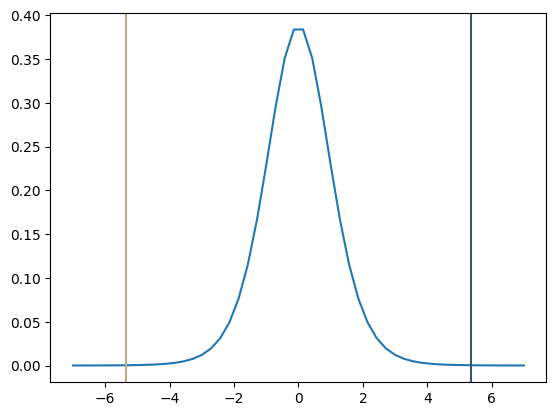

p-value = 0.00045894515934558235


In [93]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.sqrt(np.var(pre, ddof= 1))
sigma2 = np.sqrt(np.var(post, ddof= 1)) 
sigma = np.sqrt(((sigma1 ** 2) + (sigma2 ** 2)) / 2)

T = (np.mean(pre) - np.mean(post)) / (sigma / np.sqrt(10))
print("T =", T)

xs = np.linspace(-7, 7)
ts = stats.t.pdf(xs, 9)
plt.plot(xs, ts)
plt.axvline(T, linestyle='-', color='#BDAD7E')
plt.axvline(-T, linestyle='-', color='#3C5664')
plt.show()

pvalue = stats.t.cdf(T, 9) + (1. - stats.t.cdf(-T, 9))
print("p-value =", pvalue)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

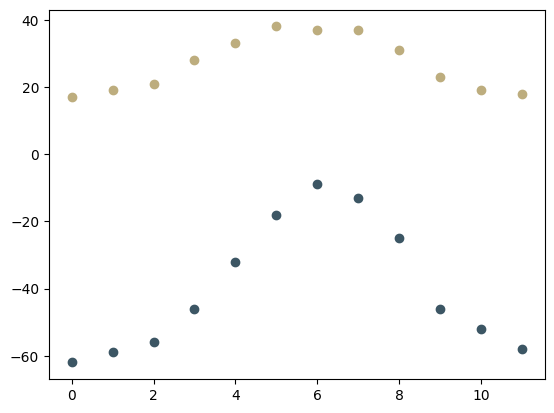

Max Temperatures Params: [23.09209401  5.7358167  -2.29443781 15.77930683]
Min Temperatures Params: [ 52.64929242   6.16452594   1.97590023 -61.32093749]


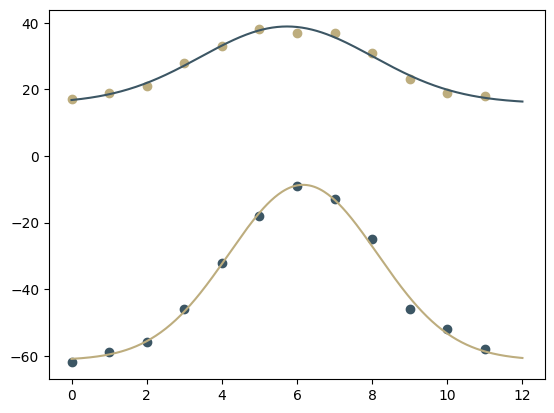

In [94]:
max_arr=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]) 
min_arr=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

x= np.arange(0,12)
plt.scatter(x, max_arr, color='#BDAD7E')
plt.scatter(x, min_arr, color='#3C5664')
plt.show()

def gaussian(x, a, x0, sigma, o):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + o

x2= np.arange(0,12)
resMax, covMax=scipy.optimize.curve_fit(gaussian, x2, max_arr, p0= [6, 1, 20, 40])
resMin, covMin=scipy.optimize.curve_fit(gaussian, x2, min_arr, p0 = [50, 6, 1, -60])

print("Max Temperatures Params:", resMax)
print("Min Temperatures Params:", resMin)

x = np.linspace(0, 12, num=365)
y_max = gaussian(x, resMax[0], resMax[1], resMax[2], resMax[3])
y_min = gaussian(x, resMin[0], resMin[1], resMin[2], resMin[3])

plt.plot(x, y_max, color='#3C5664')
plt.plot(x, y_min, color='#BDAD7E')
plt.scatter(x2, max_arr, color='#BDAD7E')
plt.scatter(x2, min_arr, color='#3C5664')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

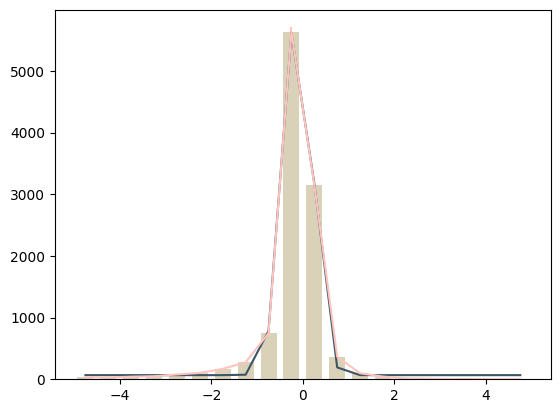

In [95]:
def gaussian(x, a, mu, sigma, o):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + o

residuals_261 = np.load('data/residuals_261.pkl', allow_pickle=True)
df= pd.DataFrame(residuals_261.item(), columns=['residuals'])
plt.figure()
n, bins, patches = plt.hist(df, bins=20, color='#BDAD7E', alpha=0.55, rwidth=0.7, range = (-5,5))
bin_cntr = (bins[:-1] + bins[1:]) / 2
plt.errorbar(x = bin_cntr, y = n, yerr= np.sqrt(np.abs(n)), color="#FFC3C0")
params, cov = optimize.curve_fit(gaussian, bin_cntr, n)
fitted_gaussian = gaussian(bin_cntr, *params)
plt.plot(bin_cntr, gaussian(bin_cntr, *params), color='#3C5664')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

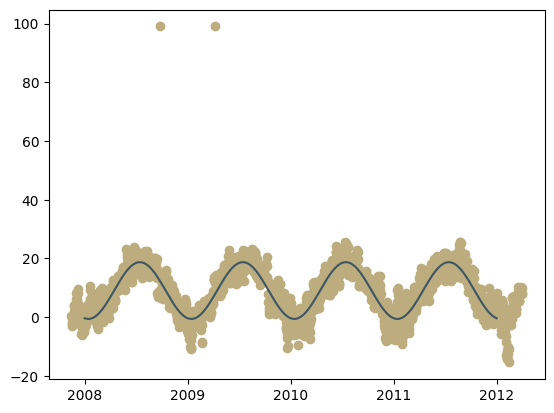

In [96]:
date, temperature = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)

def f(t, a, c, d):
    return a * np.cos(2 * np.pi * t + c) + d

pOptimal, pcov = curve_fit(f, date, temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], 'o', color='#BDAD7E')
xfine = np.linspace(2008, 2012, 200)
plt.plot(xfine, f(xfine, *pOptimal), color='#3C5664')